# Module 7 Project -Task 2

Author: [Hayley Massey](https://github.com/HMas522)
Repository: [datafun-datafun-07-ml-predictive](https://github.com/HMas522/datafun-07-ml-predictive)

# Section 1 - Chapter 15 Examples for Practice

# Section 1.1 

In [2]:
#import
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Display the target values of every 100th sample
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [4]:
# Confirm number of samples: shape attribute
digits.data.shape

(1797, 64)

In [5]:
# Flatten a two-dimensional array into a one-dimensional array: Sample image at index 13
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [6]:
#Display the 8x8 image data
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [7]:
digits.target[22]

2

# Section 1.2 - Visualizing the Data

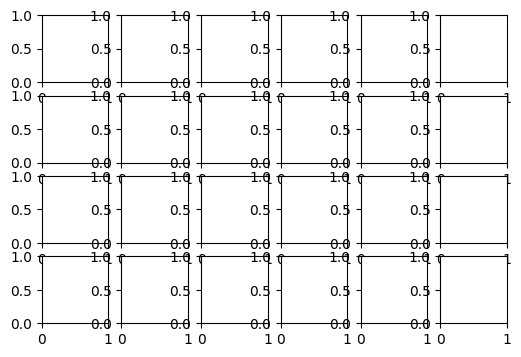

In [8]:
#import and display
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [10]:
#Prepare the image
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

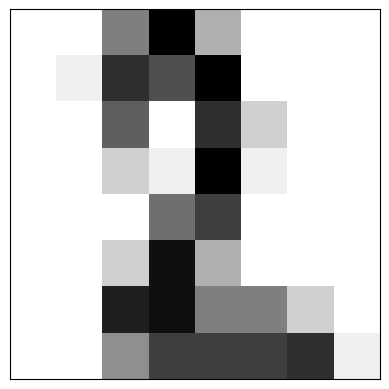

In [12]:
#Display the image
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

# Section 2 Practice splitting data for training & testing

# Section 2.1 -Train & Test

In [13]:
#import
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

In [14]:
#75% for Train
x_train.shape

(1347, 64)

In [15]:
#25% for Test
x_test.shape

(450, 64)

In [27]:
# Different split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.40
)

In [28]:
y_train.shape

(1078,)

In [29]:
y_test.shape

(719,)

# Section 2.2 - KNeighborsClassifier()

In [30]:
#import
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [34]:
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

# Section 2.3 - Predicting Digit Classes

In [35]:
#Set-up
predicted = knn.predict(x_test)
expected = y_test

In [36]:
#predicted
predicted[:20]

array([0, 2, 4, 8, 7, 1, 9, 6, 3, 4, 4, 2, 9, 0, 7, 8, 0, 4, 1, 7])

In [37]:
#expected
expected[:20]

array([0, 2, 4, 8, 7, 1, 9, 6, 3, 5, 4, 2, 9, 0, 7, 8, 0, 4, 1, 7])

In [38]:
#predicted and expected vlaues do not match
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(4, 5),
 (3, 8),
 (2, 8),
 (1, 8),
 (1, 8),
 (5, 9),
 (7, 9),
 (6, 5),
 (9, 7),
 (1, 8),
 (9, 5),
 (1, 8),
 (1, 8),
 (1, 8),
 (2, 3),
 (7, 4)]

# Section 2.4 - Metrics Model for Accuracy

In [39]:
#Estimator using score method
print(f'{knn.score(x_test, y_test):.2%}')

97.77%


In [40]:
#confusion matrix
#import & display
#principal diagonal indicate incorrect predictions
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 70,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 67,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 66,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 73,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  1],
       [ 0,  6,  1,  1,  0,  0,  0,  0, 71,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 75]], dtype=int64)

In [41]:
#Call classification report
#Displays classification metrics based on expected and predicted values
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.90      1.00      0.95        55
           2       0.97      1.00      0.99        70
           3       0.99      0.99      0.99        68
           4       0.99      0.99      0.99        75
           5       0.99      0.96      0.97        69
           6       0.99      1.00      0.99        73
           7       0.97      0.99      0.98        71
           8       1.00      0.90      0.95        79
           9       0.97      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



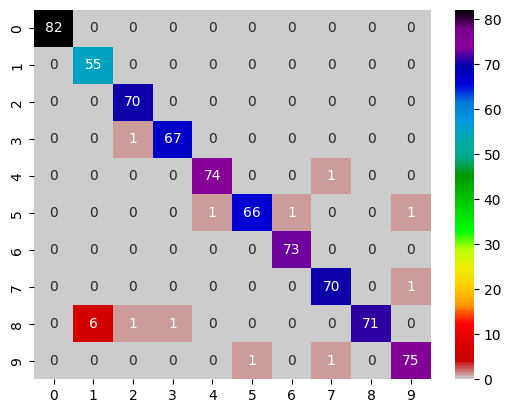

In [42]:
#Visualize
#Draws attention to incorrect predictions
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')